script start:  2021-03-02 20:47:42.428535


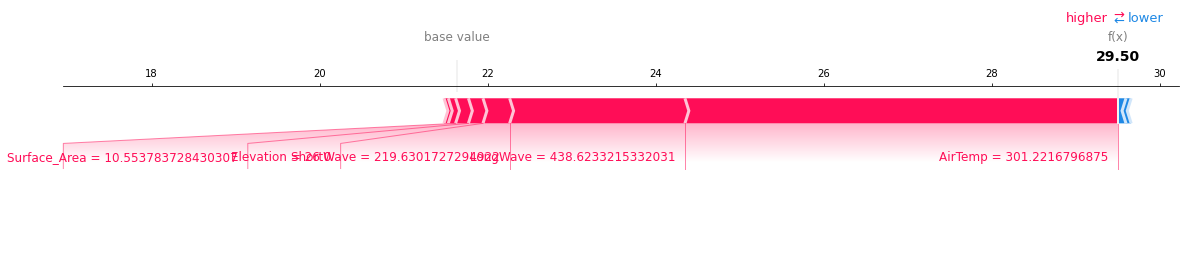

finished


In [9]:
import pandas as pd
import numpy as np
import pdb
import sys
import os
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from joblib import dump, load
import re
import datetime
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score
import lime
from lime import lime_tabular
##################################################################3
# (Jan 2020 - Jared) - 
####################################################################3

currentDT = datetime.datetime.now()
print("script start: ",str(currentDT))

#file to save model  to


# metadata = pd.read_csv("../../metadata/conus_source_metadata.csv")
metadata = pd.read_csv("../../metadata/surface_lake_metadata_021521_wCluster.csv")

# train_lakes = metadata['site_id'].values

#############################
#load data
# train_lakes = np.load("../../data/static/lists/source_lakes_wrr.npy")



columns = ['Surface_Area','Latitude','Longitude', 
     'Elevation','ShortWave','LongWave','AirTemp','WindSpeedU','WindspeedV',
     # 'ShortWave_t-4','LongWave_t-4','AirTemp_t-4','WindSpeedU_t-4','WindSpeedV_t-4',
     # 'ShortWave_t-3','LongWave_t-3','AirTemp_t-3','WindSpeedU_t-3','WindSpeedV_t-3',
     # 'ShortWave_t-2','LongWave_t-2','AirTemp_t-2','WindSpeedU_t-2','WindSpeedV_t-2',\
     # 'ShortWave_t-1','LongWave_t-1','AirTemp_t-1','WindSpeedU_t-1','WindSpeedV_t-1',\
     # 'ShortWave_t-14','LongWave_t-14','AirTemp_t-14','WindSpeedU_t-14','WindSpeedV_t-14',\
     # 'ShortWave_t-30','LongWave_t-30','AirTemp_t-30','WindSpeedU_t-30','WindSpeedV_t-30',\
     'Surface_Temp']
# X = np.array(c)
# new_c = np.append(
#                   np.append(
#                             np.append(
#                                       X[i,:],
#                                       X[i-lookback:i,4:].flatten()),
#                             X[i-14,4:])
#                   ,X[i-30,4:])
train_df = pd.DataFrame(columns=columns)

param_search = True

# lookback = 4
# farthest_lookback = 30
#build training set
# k = int(sys.argv[1])
train = True
save_file_path = '../../models/xgb_lagless_surface_temp_fold0_03012021_lime.joblib'

final_output_df = pd.DataFrame()
result_df = pd.DataFrame(columns=['site_id','temp_pred_xgb','temp_actual'])

# train_lakes = metadata[metadata['5fold_fold']!=k]['site_id'].values[:400]
# # lakenames = metadata['site_id'].values
# test_lakes = metadata[metadata['5fold_fold']==k]['site_id'].values[:400]
# assert(np.isin(train_lakes,test_lakes,invert=True).all())
train_df = pd.DataFrame(columns=columns)
test_df = pd.DataFrame(columns=columns)

# if train:
#     for ct, lake_id in enumerate(train_lakes):
#         # if ct %100 == 0:
#         print("fold ",k," assembling training lake ",ct,"/",len(train_lakes),": ",lake_id)
#         #load data
#         feats = np.load("../../data/processed/"+lake_id+"/features_ea_conus_021621.npy")
#         labs = np.load("../../data/processed/"+lake_id+"/full.npy")
#         # dates = np.load("../../data/processed/"+name+"/dates.npy")
#         data = np.concatenate((feats[:,:],labs.reshape(labs.shape[0],1)),axis=1)
#         X = data[:,:-1]
#         y = data[:,-1]
#         inds = np.where(np.isfinite(y))[0]
#         # inds = inds[np.where(inds > farthest_lookback)[0]]
#         X = np.array([X[i,:] for i in inds],dtype = np.float)
#         y = y[inds]
#         #remove days without obs
#         data = np.concatenate((X,y.reshape(len(y),1)),axis=1)

#         # data = data[np.where(np.isfinite(data[:,-1]))]
#         new_df = pd.DataFrame(columns=columns,data=data)
#         train_df = pd.concat([train_df, new_df], ignore_index=True)

#     X = train_df[columns[:-1]].values
#     y = np.ravel(train_df[columns[-1]].values)

#     print("train set dimensions: ",X.shape)
#     #construct lookback feature set??
#     model = xgb.XGBRegressor(booster='gbtree',n_estimators=5000,learning_rate=.025,max_depth=6,min_child_weight=11,subsample=.8,colsample_bytree=.7,random_state=2)
#     # model = xgb.XGBRegressor(booster='gbtree',n_estimators=1000,learning_rate=.05,max_depth=6,min_child_weight=11,subsample=.8,colsample_bytree=.7,random_state=2)

#     if train:
#         train_df.to_feather("./xgb_lime_trn.feather")
#         print("Training XGB regression model...fold ",k)
#         model.fit(X, y)
#         dump(model, save_file_path)
#         print("model trained and saved to ", save_file_path)

# else:
model = load(save_file_path)

train_df = pd.read_feather("xgb_lime_trn.feather")



# importances = model.feature_importances_
# print(importances)
# sorted_feats = [x for _,x in sorted(zip(importances,columns[:-1]))]
# sorted_imps = [x for x,_ in sorted(zip(importances,columns[:-1]))]
# pdb.set_trace()
# X = new_df[columns[:-1]].values
# y_act = np.ravel(new_df[columns[-1]].values)
# y_pred = model.predict(X)
# rmse  = np.sqrt(((y_pred-y)**2).mean())
# print("trn rmse: ",rmse)
#test
# for ct, lake_id in enumerate(test_lakes):
#     # if ct %100 == 0:
#     print("fold ",k,"  test lake ",ct,"/",len(test_lakes),": ",lake_id)
#     #load data
#     feats = np.load("../../data/processed/"+lake_id+"/features_ea_conus_021621.npy")
#     labs = np.load("../../data/processed/"+lake_id+"/full.npy")
#     # dates = np.load("../../data/processed/"+name+"/dates.npy")
#     data = np.concatenate((feats[:,:],labs.reshape(labs.shape[0],1)),axis=1)
#     X = data[:,:-1]
#     y = data[:,-1]
#     inds = np.where(np.isfinite(y))[0]
#     # inds = inds[np.where(inds > farthest_lookback)[0]]
#     X = np.array([X[i,:] for i in inds],dtype = np.float)
#     y = y[inds]
#     #remove days without obs
#     data = np.concatenate((X,y.reshape(len(y),1)),axis=1)
#     # data = data[np.where(np.isfinite(data[:,-1]))]
#     new_df = pd.DataFrame(columns=columns,data=data)
#     test_df = pd.concat([test_df, new_df], ignore_index=True)



# test_df.to_feather("./xgb_lime_tst.feather")
test_df = pd.read_feather("./xgb_lime_tst.feather")

    # X = new_df[columns[:-1]].values
    # y_act = np.ravel(new_df[columns[-1]].values)
    # y_pred = model.predict(X)

    # df = pd.DataFrame()
    # df['temp_pred_xgb'] = y_pred
    # df['temp_actual'] = y_act
    # df['site_id'] = lake_id
    # result_df = result_df.append(df)
    # rmse  = np.sqrt(((y_pred-y_act)**2).mean())
    # print("tst rmse: ",rmse)

# for ct, lake_id2 in enumerate(test_lakes):
#     if ct %100 == 0:
#       print("fold ",k,"  test lake ",ct,"/",len(test_lakes),": ",lake_id2)
#     #load data
#     feats2 = np.load("../../data/processed/"+lake_id2+"/features_ea_conus_021621.npy")
#     labs2 = np.load("../../data/processed/"+lake_id2+"/full.npy")
#     # dates = np.load("../../data/processed/"+name+"/dates.npy")
#     data2 = np.concatenate((feats2[:,:],labs2.reshape(labs2.shape[0],1)),axis=1)
#     X2 = data2[:,:-1]
#     y2 = data2[:,-1]
#     inds2 = np.where(np.isfinite(y2))[0]
#     inds2 = inds2[np.where(inds2 > farthest_lookback)[0]]
#     if lookback > 0:
#         X2 = np.array([np.append(np.append(np.append(X2[i2,:],X2[i2-lookback:i2,4:].flatten()),X2[i2-14,4:]),X2[i2-30,4:]) for i2 in inds2],dtype = np.float)
#         y2 = y2[inds2]
#     #remove days without obs
#     data2 = np.concatenate((X2,y2.reshape(len(y2),1)),axis=1)
#     data2 = data2[np.where(np.isfinite(data2[:,-1]))]
#     new_df2 = pd.DataFrame(columns=columns,data=data2)
#     X2 = new_df2[columns[:-1]].values
#     y_act2 = np.ravel(new_df2[columns[-1]].values)
#     y_pred2 = model.predict(X2)

#     df2 = pd.DataFrame()
#     df2['temp_pred_xgb'] = y_pred2
#     df2['temp_actual'] = y_act2
#     df2['site_id'] = lake_id2
#     result_df = result_df.append(df2)
      # test_df = pd.concat([test_df, new_df], ignore_index=True)

# import lime
# from lime import lime_tabular
# explainer = lime_tabular.LimeTabularExplainer(training_data=train_df.values[:,:-1],mode='regression',feature_names='columns')
# exp = explainer.explain_instance(data_row=test_df.iloc[1,:-1], predict_fn=model.predict)
# exp.show_in_notebook(show_table=True)



import shap
explainerXGB = shap.TreeExplainer(model)
shap_values_XGB_test = explainerXGB.shap_values(test_df.values[:,:-1])
shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test[0], test_df.iloc[0,:-1],matplotlib=True)



# result_df.reset_index(inplace=True)
# print("tst rmse: ",np.sqrt(((result_df['temp_pred_xgb']-result_df['temp_actual'])**2).mean()))

# result_df.to_feather("../../results/xgb_lagless_0301201_fold"+str(k)+".feather")
# if param_search:
#     gbm = xgb.XGBRegressor(booster='gbtree',n_estimators=10000,learning_rate=.025,max_depth=6,min_child_weight=11,subsample=.8,colsample_bytree=.7)
#     nfolds = 3
#     parameters = {'objective':['reg:squarederror'],
#                   'learning_rate': [.025, 0.05], #so called `eta` value
#                   'max_depth': [6],
#                   'min_child_weight': [11],
#                   'subsample': [0.8],
#                   'colsample_bytree': [0.7],
#                   'n_estimators': [5000,10000,15000], #number of trees, change it to 1000 for better results
#                   }
#     def gb_param_selection(X, y, nfolds):
#         # ests = np.arange(1000,6000,600)
#         # lrs = [.05,.01]
#         # max_d = [3, 5]
#         # param_grid = {'n_estimators': ests, 'learning_rate' : lrs}
#         # grid_search = GridSearchCV(gbm, param_grid, cv=nfolds, n_jobs=-1,verbose=1)
#         grid_search = GridSearchCV(gbm, parameters, n_jobs=-1, cv=nfolds,verbose=1)
#         grid_search.fit(X, y)
#         # print(grid_search.best_params_)
#         return grid_search.best_params_

print("finished")
#     parameters = gb_param_selection(X, y, nfolds)
#     print(parameters)

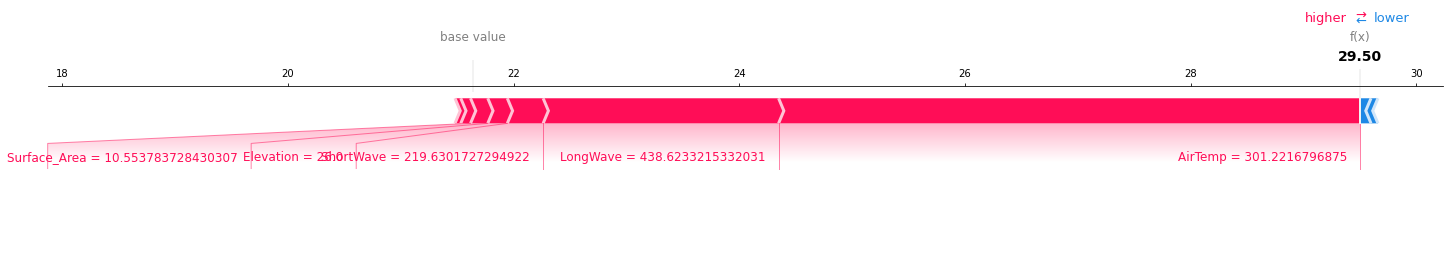

In [14]:
shap.force_plot(explainerXGB.expected_value, shap_values_XGB_test[0], test_df.iloc[0,:-1],matplotlib=True,figsize=(25, 3))
